In [12]:
!pip install plotly nbformat matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 8.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 6.4 MB/s eta 0:00:00ta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.7 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)


# Setup

In [2]:
import transformers
import numpy as np
from transformers import AutoModel, AutoTokenizer, AutoModelForMaskedLM
import plotly.figure_factory as ff

In [3]:

def extract_weights_to_numpy(model):
    weights = {}
    # Loop through the model parameters
    for name, param in model.named_parameters():
        weights[name] = param.detach().cpu().numpy()  # Convert to numpy array
    return weights


In [4]:
# model_good = AutoModel.from_pretrained('../../models/good_model/checkpoint-150000')
# model_good_another = AutoModel.from_pretrained('../../models/good_model/checkpoint-180000', output_hidden_states=True)
# model_bad = AutoModel.from_pretrained('../../models/bad_model/checkpoint-150000')

In [5]:
model = AutoModelForMaskedLM.from_pretrained("cointegrated/rubert-tiny2")

In [6]:
tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny2')

In [7]:
# Now, use the function to get the weights
weights_numpy = extract_weights_to_numpy(model)

In [8]:
weights_numpy.keys()

dict_keys(['bert.embeddings.word_embeddings.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.

# Method 1. Neurons comparison

In [4]:
import numpy as np

def get_concatenated_weights(model, layer_names):
    # Concatenate weights for specified layers
    concat_weights = []
    for name, param in model.named_parameters():
        if any(layer_name in name for layer_name in layer_names):
            # Flatten and append weights
            concat_weights.append(param.detach().cpu().numpy().flatten())
    return np.concatenate(concat_weights)

def compare_models(model1, model2, layer_names):
    weights1 = get_concatenated_weights(model1, layer_names)
    weights2 = get_concatenated_weights(model2, layer_names)
    
    # Calculate difference
    difference = np.linalg.norm(weights1 - weights2)
    return difference

# Specify the layers you are interested in
layers_of_interest = [
    'encoder.layer.0.attention.self.query',
    'encoder.layer.0.attention.self.key',
    'encoder.layer.0.attention.self.value'
]


In [5]:
def create_heatmap(matrix1, matrix2, title):
    # Calculate the difference
    difference = matrix1 - matrix2
    
    # Generate heatmap
    fig = ff.create_annotated_heatmap(
        z=difference,
        x=list(range(difference.shape[1])),
        y=list(range(difference.shape[0])),
        colorscale='Viridis'
    )
    
    fig.update_layout(title_text=title, xaxis_title="Dimension 2", yaxis_title="Dimension 1")
    
    fig.show()

In [8]:

# Calculate the difference
diff = compare_models(model_good, model_bad, layers_of_interest)
print(f"Difference in weights: {diff}")


Difference in weights: 37.6356201171875


In [25]:
def extract_weight_matrix(model, layer_name):
    weight_matrix = None
    for name, param in model.named_parameters():
        if layer_name in name and 'weight' in name:
            weight_matrix = param.detach().cpu().numpy()
            break
    return weight_matrix

# Layer to visualize
layer_to_visualize = 'encoder.layer.0.attention.self.value.weight'

# Extract matrices
weight_matrix1 = extract_weight_matrix(model_good, layer_to_visualize)
weight_matrix2 = extract_weight_matrix(model_bad, layer_to_visualize)


In [37]:
import matplotlib.pyplot as plt

def create_heatmap_plt(matrix1, matrix2, title):
    # Calculate the absolute difference
    difference = (matrix1 - matrix2)**2
    
    # Generate heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(difference, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Dimension 2")
    plt.ylabel("Dimension 1")
    plt.show()

In [11]:
weight_matrix2.shape

(768, 768)

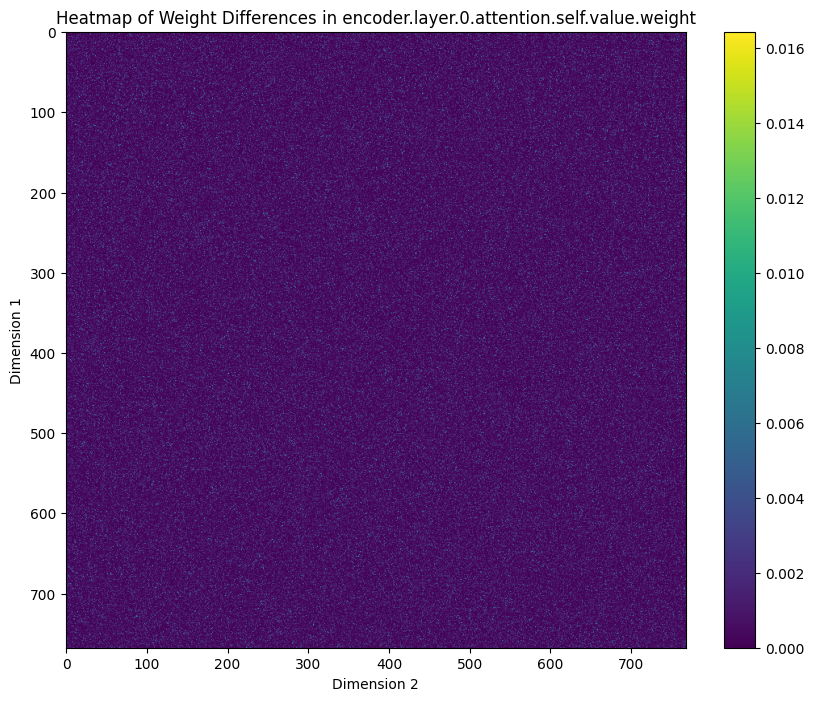

In [27]:
# Layer to visualize
layer_to_visualize = 'encoder.layer.0.attention.self.value.weight'

# Extract matrices
weight_matrix1 = extract_weight_matrix(model_good, layer_to_visualize)
weight_matrix2 = extract_weight_matrix(model_bad, layer_to_visualize)
# Create a heatmap of their differences
create_heatmap_plt(weight_matrix1, weight_matrix2, f"Heatmap of Weight Differences in {layer_to_visualize}")


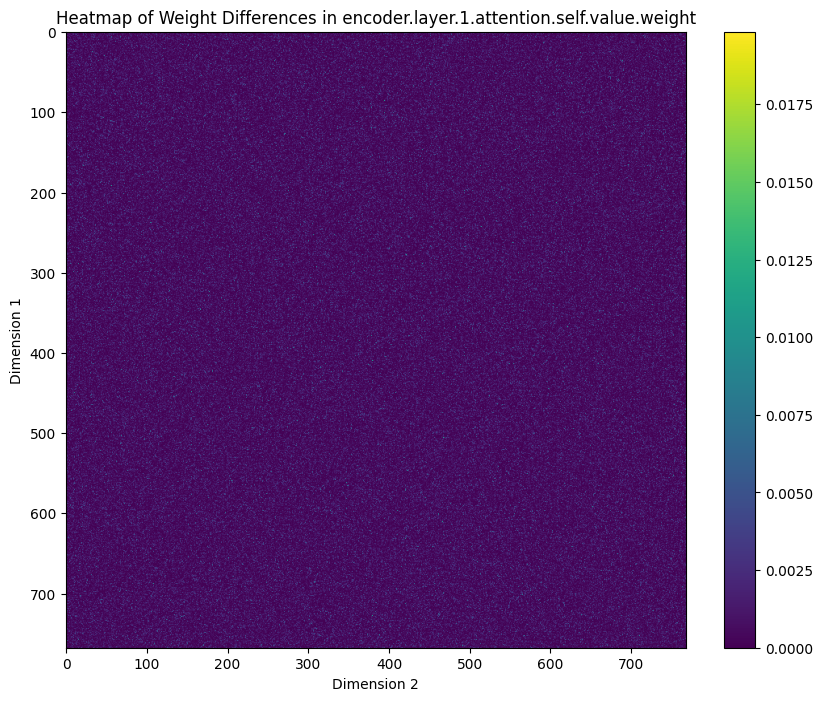

In [28]:
# Layer to visualize
layer_to_visualize = 'encoder.layer.1.attention.self.value.weight'

# Extract matrices
weight_matrix1 = extract_weight_matrix(model_good, layer_to_visualize)
weight_matrix2 = extract_weight_matrix(model_bad, layer_to_visualize)
# Create a heatmap of their differences
create_heatmap_plt(weight_matrix1, weight_matrix2, f"Heatmap of Weight Differences in {layer_to_visualize}")


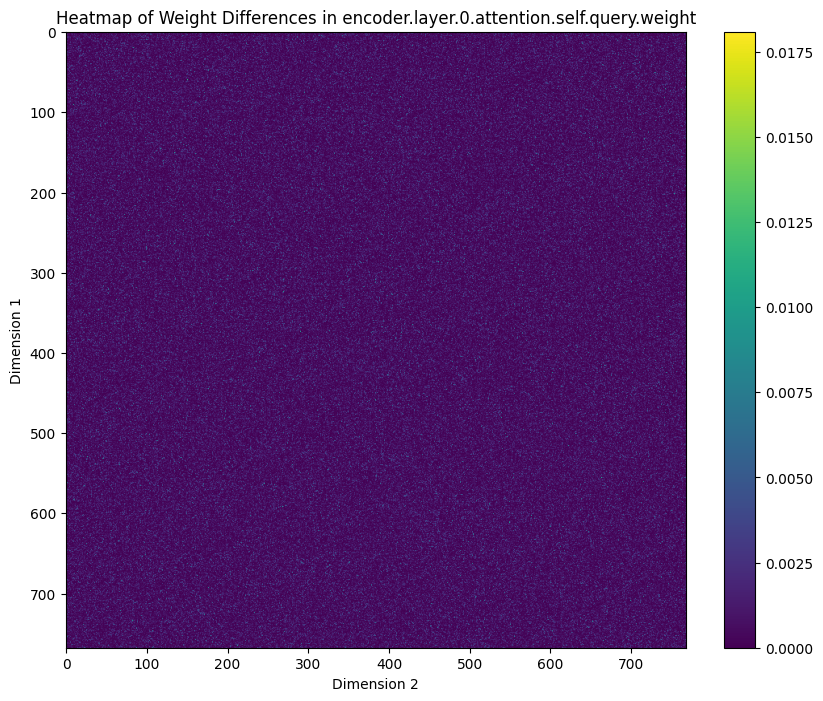

In [38]:
# Layer to visualize
layer_to_visualize = 'encoder.layer.0.attention.self.query.weight'

# Extract matrices
weight_matrix1 = extract_weight_matrix(model_good, layer_to_visualize)
weight_matrix2 = extract_weight_matrix(model_good_another, layer_to_visualize)
# Create a heatmap of their differences
create_heatmap_plt(weight_matrix1, weight_matrix2, f"Heatmap of Weight Differences in {layer_to_visualize}")


# Method 2. Subnetwork search

In [10]:
def extract_activations(sentences, model, tokenizer):
    activations = []

    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors='pt')
        outputs = model(**inputs)
        print(outputs)
        hidden_states = outputs.hidden_states
        
        # Example: Getting the activations from the last layer
        last_layer_activations = hidden_states[-1].squeeze(0).detach().numpy()
        
        activations.append(last_layer_activations)
    
    return activations


In [11]:
# from neurox.interpretation.decompose import get_ffn_activations

# def extract_activations(model, tokenizer, data, layer=-1):
#     sentences = [example['sentence'] for example in data['validation']]
#     tokens = [tokenizer.encode(sentence, add_special_tokens=True) for sentence in sentences]

#     # Extract activations
#     activations = get_ffn_activations(model, tokens, layer)
#     return activations
import json
import h5py
dataset = [
    "Он видел красивую девушку", 
    "Лето было жаркое", 
    "Я получил подарок", 
    "Вода чистая"
]

activations = extract_activations(dataset, model, tokenizer)
activations_list = [activation.tolist() for activation in activations]
# with open('activations.json', 'w') as f:
#     json.dump(activations_list, f)


MaskedLMOutput(loss=None, logits=tensor([[[-16.5951,  -5.8634, -11.1955,  ...,  -5.2665,  -3.4732,  -5.4040],
         [-13.3578,  -6.1208, -11.6511,  ...,  -2.1067,  -4.5100,  -5.8246],
         [-14.9840,  -8.1370, -12.0506,  ...,  -5.7795,  -5.6702,  -3.5586],
         [-16.0543,  -6.4852, -12.2963,  ...,  -8.8575,  -6.3120,  -3.8781],
         [-18.2586,  -3.2916, -14.1705,  ..., -10.6677,  -7.6826,  -8.1302],
         [-20.0265,  -5.5383, -14.0489,  ...,  -7.1274,  -7.2543,  -8.0849]]],
       grad_fn=<ViewBackward0>), hidden_states=None, attentions=None)


TypeError: 'NoneType' object is not subscriptable

In [32]:
activations[3]

array([[ 1.524077  , -0.45216197, -0.02458792, ..., -0.9922805 ,
        -0.7690452 , -1.7577755 ],
       [ 0.50023824, -1.1305969 , -1.3706034 , ...,  0.21461555,
        -0.7589292 ,  0.29426745],
       [ 0.31128225, -0.7276662 ,  0.247041  , ..., -0.1605722 ,
         0.2746648 , -0.52475375],
       [ 0.18054573, -1.6324182 ,  0.8150402 , ..., -0.5318811 ,
        -1.4478437 , -1.232717  ]], dtype=float32)

In [12]:
class JSONWriter:
    def __init__(self, file_path):
        self.file_path = file_path

    def save_activations(self, sentences, activations, tokenizer):
        with open(self.file_path, 'w') as f:
            for idx, (sentence, activation) in enumerate(zip(sentences, activations)):
                tokens = tokenizer.tokenize(sentence)
                features = []
                
                for i, token_activation in enumerate(activation):
                    token_features = {
                        'token': tokens[i],
                        'layers': [{'index': l, 'values': layer.tolist()} for l, layer in enumerate(token_activation)]
                    }
                    features.append(token_features)

                json_line = {
                    'linex_idx': idx,
                    'features': features
                }
                
                f.write(json.dumps(json_line) + '\n')

In [26]:
import h5py

class HDF5Writer:
    def __init__(self, file_path):
        self.file_path = file_path

    def save_activations(self, sentences, activations):
        with h5py.File(self.file_path, 'w') as f:
            sentence_to_idx = {sentence: idx for idx, sentence in enumerate(sentences)}
            f.create_dataset('sentence_to_index', data=json.dumps(sentence_to_idx))
            
            for idx, activation in enumerate(activations):
                # Adjust activation shape to (num_layers, sentence_length, embedding_size)
                f.create_dataset(str(idx), data=activation)


In [27]:
hdf5_writer = HDF5Writer(file_path='activations.hdf5')
hdf5_writer.save_activations(dataset, activations)

In [13]:
json_writer = JSONWriter(file_path='activations.json')
json_writer.save_activations(dataset, activations, tokenizer)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
import NeuroX.neurox.data.loader as dl

activations = dl.load_activations('activations.hdf5')

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensions and visualize
pca = PCA(n_components=2)
reduced_activations = pca.fit_transform(activations)
threshold = 0.01
plt.scatter(reduced_activations[:, 0], reduced_activations[:, 1])
plt.title('Neuron Activation PCA')
plt.show()

# Further analysis to extract importance, e.g., using variance
neuron_importance = pca.explained_variance_ratio_
important_neurons = [i for i, importance in enumerate(neuron_importance) if importance > threshold]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [ ]:
class SubnetBERT(torch.nn.Module):
    def __init__(self, model, important_neurons):
        super(SubnetBERT, self).__init__()
        self.important_neurons = important_neurons
        self.bert = model.bert
        self.classifier = torch.nn.Linear(len(important_neurons), model.num_labels)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        sequence_output = outputs[0]
        pooled_output = sequence_output[:, self.important_neurons, :].mean(1)
        logits = self.classifier(pooled_output)
        return logits

subnet_model = SubnetBERT(model, important_neurons)


In [ ]:
subnet_trainer = Trainer(
    model=subnet_model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)

subnet_trainer.train()


In [ ]:
results = subnet_trainer.evaluate()
print(results)


another way

In [34]:
import torch

In [33]:
def get_activations(model, tokenizer, sentences, layer_idx):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs, output_hidden_states=True)
    hidden_states = outputs.hidden_states[layer_idx]  # Extract activations from desired layer
    return hidden_states

def prune_activations(activations, threshold=0.1):
    # Compute the average activation for each neuron
    avg_activations = activations.mean(dim=0)
    
    # Identify neurons with avg activation below the threshold
    important_neurons = avg_activations > threshold
    
    return important_neurons


# Function to prune the BERT model's parameters (weights) based on important neurons
def prune_model(model, important_neurons_mask, layer_idx):
    with torch.no_grad():
        for name, param in model.named_parameters():
            if f'encoder.layer.{layer_idx}' in name and 'weight' in name:
                param.data[:, ~important_neurons_mask] = 0



In [36]:

# Example to get activations from layer 11
activations = get_activations(model_good, tokenizer, dataset, layer_idx=3)

# Prune activations
important_neurons_mask = prune_activations(activations)

prune_model(model_good, important_neurons_mask, layer_idx=11)

# Subnetwork search (fixed)

In [9]:
# read data from json
import json

with open("../probing/test_data.json", 'r') as f:
    data = json.load(f)

In [10]:
from transformers import BertModel, BertTokenizer
import torch

# Load the pretrained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny2')
model = BertModel.from_pretrained('cointegrated/rubert-tiny2')


In [11]:
sentences_with_feature = data['direct_obj_case']

In [12]:
model.to('cuda')

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(83828, 312, padding_idx=0)
    (position_embeddings): Embedding(2048, 312)
    (token_type_embeddings): Embedding(2, 312)
    (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-2): 3 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=312, out_features=312, bias=True)
            (key): Linear(in_features=312, out_features=312, bias=True)
            (value): Linear(in_features=312, out_features=312, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=312, out_features=312, bias=True)
            (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
   

In [15]:
def get_activations(model, tokenizer, sentences, layer_idx, device):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Move inputs to device
    outputs = model(**inputs, output_hidden_states=True)
    hidden_states = outputs.hidden_states[layer_idx]  # Extract activations from desired layer
    return hidden_states

# Example to get activations from layer 11
activations = get_activations(model, tokenizer, sentences_with_feature, layer_idx=2, device='cuda')


OutOfMemoryError: CUDA out of memory. Tried to allocate 13.07 GiB. GPU 

In [ ]:
def prune_activations(activations, threshold=0.1):
    # Compute the average activation for each neuron
    avg_activations = activations.mean(dim=0)
    
    # Identify neurons with avg activation below the threshold
    important_neurons = avg_activations > threshold
    
    return important_neurons

# Prune activations
important_neurons_mask = prune_activations(activations)

# Function to prune the BERT model's parameters (weights) based on important neurons
def prune_model(model, important_neurons_mask, layer_idx):
    with torch.no_grad():
        for name, param in model.named_parameters():
            if f'encoder.layer.{layer_idx}' in name and 'weight' in name:
                param.data[:, ~important_neurons_mask] = 0

prune_model(model, important_neurons_mask, layer_idx=2)


# Method 3. Sparse Autoencoder

Notation for Features

Throughout this draft, we'll use strings like "A/1/2357" to denote features. The first portion "A" or "B" denote which model the features come from. The second part (e.g. the "1" in "A/1") denotes the dictionary learning run. These vary in the number of learned factors and the L1 coefficient used. A table of all of our runs is available here. Notably, A/0…A/5 form a sequence with fixed L1 coefficients and increasing dictionary sizes. The final portion (e.g. the "2357" in "A/1/2357") corresponds to the specific feature in the run.

Sometimes, we want to denote neurons from the transformer rather than features learned by the sparse autoencoder. In this case, we use the notation "A/neurons/32".

In [7]:
import torch


# Sample input text
texts = ["This is a sample sentence.", "Another example text."]
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

# Capture activations
with torch.no_grad():
    outputs = model_good(**inputs)

# Extract activations from a specific layer (e.g., CLS token from last hidden layer)
activations = outputs.last_hidden_state[:, 0, :].numpy()  # Shape: [batch_size, hidden_size]


In [9]:
from sklearn.decomposition import DictionaryLearning

# Perform dictionary learning
n_components = 100  # Number of dictionary atoms (features)
dict_learner = DictionaryLearning(n_components=n_components, transform_algorithm='lasso_lars', transform_n_nonzero_coefs=5)
sparse_codes = dict_learner.fit_transform(activations)
dictionary = dict_learner.components_

# The sparse_codes matrix indicates the activation of each dictionary atom for each sample
# The dictionary matrix contains the learned features


In [11]:
import numpy as np

# Identify the neurons that contribute most to each dictionary atom
threshold = 0.1  # Adjust threshold based on your needs
monosemantic_neurons = []

for i in range(n_components):
    feature = dictionary[i]
    significant_neurons = np.where(np.abs(feature) > threshold)[0]
    monosemantic_neurons.append(significant_neurons)

# monosemantic_neurons[i] contains the indices of important neurons for the i-th dictionary atom


In [15]:
# Example: Check activations for a specific text and feature
test_text = "A new input sentence."
inputs = tokenizer(test_text, return_tensors='pt')
with torch.no_grad():
    outputs = model_good(**inputs)

test_activations = outputs.last_hidden_state[:, 0, :].numpy()
sparse_code = dict_learner.transform(test_activations)

# Identify highly activated dictionary atoms
active_atoms = np.where(sparse_code[0] > threshold)[0]

# Analyze the neurons contributing to these atoms
for atom in active_atoms:
    print(f"Dictionary Atom {atom}: Neurons {monosemantic_neurons[atom]}")


Dictionary Atom 12: Neurons [181 324 330 409]
Dictionary Atom 18: Neurons [181 324 330 409]
Dictionary Atom 19: Neurons [181 324 330 409]
Dictionary Atom 28: Neurons [181 324 330 409 440]
Dictionary Atom 63: Neurons [181 324 330 409]
Dictionary Atom 83: Neurons [181 324 330 409]
Dictionary Atom 86: Neurons [181 324 330 409]
Dictionary Atom 88: Neurons [181 324 330 409 440]
Dictionary Atom 96: Neurons [181 324 330 409 440]
